In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd

In [37]:
df=pd.read_csv(r"/content/drive/MyDrive/Fraud_Detection_Project/fraudTrain.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [39]:
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time' , 'unix_time' , 'merch_lat',  'merch_long','lat','long','merchant','first','last','dob']
df.drop(columns=columns_to_drop, inplace=True)


In [40]:
df

,cc_num,category,amt,gender,street,city,state,zip,city_pop,job,trans_num,is_fraud
0,2703186189652095,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0
1,630423337322,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,0
2,38859492057661,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0
3,3534093764340240,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,0
4,375534208663984,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,entertainment,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,84735,258,Geoscientist,440b587732da4dc1a6395aba5fb41669,0
1296671,6011149206456997,food_dining,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,100,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,0
1296672,3514865930894695,food_dining,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,899,Naval architect,483f52fe67fabef353d552c1e662974c,0
1296673,2720012583106919,food_dining,74.90,M,42933 Ryan Underpass,Manderson,SD,57756,1126,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   cc_num     1296675 non-null  int64  
 1   category   1296675 non-null  object 
 2   amt        1296675 non-null  float64
 3   gender     1296675 non-null  object 
 4   street     1296675 non-null  object 
 5   city       1296675 non-null  object 
 6   state      1296675 non-null  object 
 7   zip        1296675 non-null  int64  
 8   city_pop   1296675 non-null  int64  
 9   job        1296675 non-null  object 
 10  trans_num  1296675 non-null  object 
 11  is_fraud   1296675 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 118.7+ MB


In [42]:
columns_to_drop = ['street']
df.drop(columns=columns_to_drop, inplace=True)

In [43]:
df2=pd.read_csv(r"/content/drive/MyDrive/Fraud_Detection_Project/fraudTest.csv")
df2

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [44]:
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time' , 'unix_time' , 'merch_lat',  'merch_long','lat','long','merchant','first','last','dob']
df2.drop(columns=columns_to_drop, inplace=True)

In [45]:
columns_to_drop = ['street']
df2.drop(columns=columns_to_drop, inplace=True)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cc_num     555719 non-null  int64  
 1   category   555719 non-null  object 
 2   amt        555719 non-null  float64
 3   gender     555719 non-null  object 
 4   city       555719 non-null  object 
 5   state      555719 non-null  object 
 6   zip        555719 non-null  int64  
 7   city_pop   555719 non-null  int64  
 8   job        555719 non-null  object 
 9   trans_num  555719 non-null  object 
 10  is_fraud   555719 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 46.6+ MB


In [47]:
unique_counts = df2['is_fraud'].value_counts()
unique_counts

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [48]:
unique_counts = df['is_fraud'].value_counts()
unique_counts

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [49]:
df_new = df2[df2['is_fraud'] == 1].copy()

In [50]:
df_new.reset_index(drop=True, inplace=True)

In [51]:
df_new

,cc_num,category,amt,gender,city,state,zip,city_pop,job,trans_num,is_fraud
0,3560725013359375,health_fitness,24.84,F,Notrees,TX,79759,23,Cytogeneticist,16bf2e46c54369a8eab2214649506425,1
1,6564459919350820,misc_net,780.52,M,Benton,WI,53803,1306,Public relations officer,ab4b379d2c0c9c667d46508d4e126d72,1
2,6564459919350820,entertainment,620.33,M,Benton,WI,53803,1306,Public relations officer,47a9987ae81d99f7832a54b29a77bf4b,1
3,4005676619255478,shopping_net,1077.69,M,Denham Springs,LA,70726,71335,Herbalist,fe956c7e4a253c437c18918bf96f7b62,1
4,3560725013359375,shopping_pos,842.65,F,Notrees,TX,79759,23,Cytogeneticist,f6838c01f5d2262006e6b71d33ba7c6d,1
...,...,...,...,...,...,...,...,...,...,...,...
2140,2242176657877538,shopping_pos,1041.51,M,Senatobia,MS,38668,14462,Database administrator,35b0297dd026d2e9a75d024a5dec7955,1
2141,2242176657877538,shopping_pos,868.09,M,Senatobia,MS,38668,14462,Database administrator,da7f67d7375f10a054a3d919448c45dd,1
2142,2242176657877538,shopping_net,1039.42,M,Senatobia,MS,38668,14462,Database administrator,25b076c7bcd70f272c1c5326bb234f4b,1
2143,2242176657877538,grocery_pos,289.27,M,Senatobia,MS,38668,14462,Database administrator,2df7d894868fbc99ec1d8b055585fc9d,1


In [52]:
cc_df = pd.concat([df, df_new], ignore_index=True)

In [53]:
cc_df

,cc_num,category,amt,gender,city,state,zip,city_pop,job,trans_num,is_fraud
0,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,28654,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0
1,630423337322,grocery_pos,107.23,F,Orient,WA,99160,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,0
2,38859492057661,entertainment,220.11,M,Malad City,ID,83252,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0
3,3534093764340240,gas_transport,45.00,M,Boulder,MT,59632,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,0
4,375534208663984,misc_pos,41.96,M,Doe Hill,VA,24433,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,0
...,...,...,...,...,...,...,...,...,...,...,...
1298815,2242176657877538,shopping_pos,1041.51,M,Senatobia,MS,38668,14462,Database administrator,35b0297dd026d2e9a75d024a5dec7955,1
1298816,2242176657877538,shopping_pos,868.09,M,Senatobia,MS,38668,14462,Database administrator,da7f67d7375f10a054a3d919448c45dd,1
1298817,2242176657877538,shopping_net,1039.42,M,Senatobia,MS,38668,14462,Database administrator,25b076c7bcd70f272c1c5326bb234f4b,1
1298818,2242176657877538,grocery_pos,289.27,M,Senatobia,MS,38668,14462,Database administrator,2df7d894868fbc99ec1d8b055585fc9d,1


In [54]:
cc_df['is_fraud'].value_counts()

is_fraud
0    1289169
1       9651
Name: count, dtype: int64

In [55]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298820 entries, 0 to 1298819
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   cc_num     1298820 non-null  int64  
 1   category   1298820 non-null  object 
 2   amt        1298820 non-null  float64
 3   gender     1298820 non-null  object 
 4   city       1298820 non-null  object 
 5   state      1298820 non-null  object 
 6   zip        1298820 non-null  int64  
 7   city_pop   1298820 non-null  int64  
 8   job        1298820 non-null  object 
 9   trans_num  1298820 non-null  object 
 10  is_fraud   1298820 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 109.0+ MB


In [56]:
cc_df['city'].value_counts()

city
Birmingham     5642
San Antonio    5130
Utica          5105
Phoenix        5090
Meridian       5065
               ... 
Karns City        7
Chattanooga       7
Claypool          7
Bruce             7
Wever             6
Name: count, Length: 906, dtype: int64

In [57]:
columns_to_drop = ['city','trans_num']
cc_df.drop(columns=columns_to_drop, inplace=True)

In [58]:
cc_df

,cc_num,category,amt,gender,state,zip,city_pop,job,is_fraud
0,2703186189652095,misc_net,4.97,F,NC,28654,3495,"Psychologist, counselling",0
1,630423337322,grocery_pos,107.23,F,WA,99160,149,Special educational needs teacher,0
2,38859492057661,entertainment,220.11,M,ID,83252,4154,Nature conservation officer,0
3,3534093764340240,gas_transport,45.00,M,MT,59632,1939,Patent attorney,0
4,375534208663984,misc_pos,41.96,M,VA,24433,99,Dance movement psychotherapist,0
...,...,...,...,...,...,...,...,...,...
1298815,2242176657877538,shopping_pos,1041.51,M,MS,38668,14462,Database administrator,1
1298816,2242176657877538,shopping_pos,868.09,M,MS,38668,14462,Database administrator,1
1298817,2242176657877538,shopping_net,1039.42,M,MS,38668,14462,Database administrator,1
1298818,2242176657877538,grocery_pos,289.27,M,MS,38668,14462,Database administrator,1


In [59]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298820 entries, 0 to 1298819
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   cc_num    1298820 non-null  int64  
 1   category  1298820 non-null  object 
 2   amt       1298820 non-null  float64
 3   gender    1298820 non-null  object 
 4   state     1298820 non-null  object 
 5   zip       1298820 non-null  int64  
 6   city_pop  1298820 non-null  int64  
 7   job       1298820 non-null  object 
 8   is_fraud  1298820 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 89.2+ MB


In [60]:
categories_to_encode = ['NY','TX','PA','CA','OH','FL','IL','MI','AL','MN']

category_encoding_map = {category: i + 1 for i, category in enumerate(categories_to_encode)}

cc_df['Encoded_state'] = cc_df['state'].map(category_encoding_map)

cc_df['Encoded_state'].fillna(11, inplace=True)

In [61]:
categories_to_encode = ['Copywriter, advertising','Senior tax professional/tax inspector','Audiological scientist','Prison officer','Quantity surveyor','Mechanical engineer','Surveyor, land/geomatics','Exhibition designer','Naval architect','Trading standards officer','Materials engineer']

category_encoding_map = {category: i + 1 for i, category in enumerate(categories_to_encode)}

cc_df['Encoded_job'] = cc_df['job'].map(category_encoding_map)

cc_df['Encoded_job'].fillna(12, inplace=True)

In [62]:
cc_df

,cc_num,category,amt,gender,state,zip,city_pop,job,is_fraud,Encoded_state,Encoded_job
0,2703186189652095,misc_net,4.97,F,NC,28654,3495,"Psychologist, counselling",0,11.0,12.0
1,630423337322,grocery_pos,107.23,F,WA,99160,149,Special educational needs teacher,0,11.0,12.0
2,38859492057661,entertainment,220.11,M,ID,83252,4154,Nature conservation officer,0,11.0,12.0
3,3534093764340240,gas_transport,45.00,M,MT,59632,1939,Patent attorney,0,11.0,12.0
4,375534208663984,misc_pos,41.96,M,VA,24433,99,Dance movement psychotherapist,0,11.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
1298815,2242176657877538,shopping_pos,1041.51,M,MS,38668,14462,Database administrator,1,11.0,12.0
1298816,2242176657877538,shopping_pos,868.09,M,MS,38668,14462,Database administrator,1,11.0,12.0
1298817,2242176657877538,shopping_net,1039.42,M,MS,38668,14462,Database administrator,1,11.0,12.0
1298818,2242176657877538,grocery_pos,289.27,M,MS,38668,14462,Database administrator,1,11.0,12.0


In [63]:
columns_to_drop = ['state','job']
cc_df.drop(columns=columns_to_drop, inplace=True)

In [64]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298820 entries, 0 to 1298819
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   cc_num         1298820 non-null  int64  
 1   category       1298820 non-null  object 
 2   amt            1298820 non-null  float64
 3   gender         1298820 non-null  object 
 4   zip            1298820 non-null  int64  
 5   city_pop       1298820 non-null  int64  
 6   is_fraud       1298820 non-null  int64  
 7   Encoded_state  1298820 non-null  float64
 8   Encoded_job    1298820 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 89.2+ MB


In [65]:
cc_df['category'].value_counts()

category
gas_transport     131813
grocery_pos       124123
home              123182
shopping_pos      116885
kids_pets         113100
shopping_net       98049
entertainment      94073
food_dining        91515
personal_care      90828
health_fitness     85931
misc_pos           79727
misc_net           63554
grocery_net        45493
travel             40547
Name: count, dtype: int64

In [66]:
cc_df.category=cc_df.category.replace("gas_transport",1)
cc_df.category=cc_df.category.replace("grocery_pos",2)
cc_df.category=cc_df.category.replace("home",3)
cc_df.category=cc_df.category.replace("shopping_pos",4)
cc_df.category=cc_df.category.replace("kids_pets",5)
cc_df.category=cc_df.category.replace("shopping_net",6)
cc_df.category=cc_df.category.replace("entertainment",7)
cc_df.category=cc_df.category.replace("food_dining",8)
cc_df.category=cc_df.category.replace("personal_care",9)
cc_df.category=cc_df.category.replace("health_fitness",10)
cc_df.category=cc_df.category.replace("misc_pos",11)
cc_df.category=cc_df.category.replace("misc_net",12)
cc_df.category=cc_df.category.replace("grocery_net",13)
cc_df.category=cc_df.category.replace("travel",14)

In [71]:
cc_df.gender=cc_df.gender.replace("M",1)
cc_df.gender=cc_df.gender.replace("F",2)

In [72]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298820 entries, 0 to 1298819
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   cc_num         1298820 non-null  int64  
 1   category       1298820 non-null  int64  
 2   amt            1298820 non-null  float64
 3   gender         1298820 non-null  int64  
 4   zip            1298820 non-null  int64  
 5   city_pop       1298820 non-null  int64  
 6   is_fraud       1298820 non-null  int64  
 7   Encoded_state  1298820 non-null  float64
 8   Encoded_job    1298820 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 89.2 MB


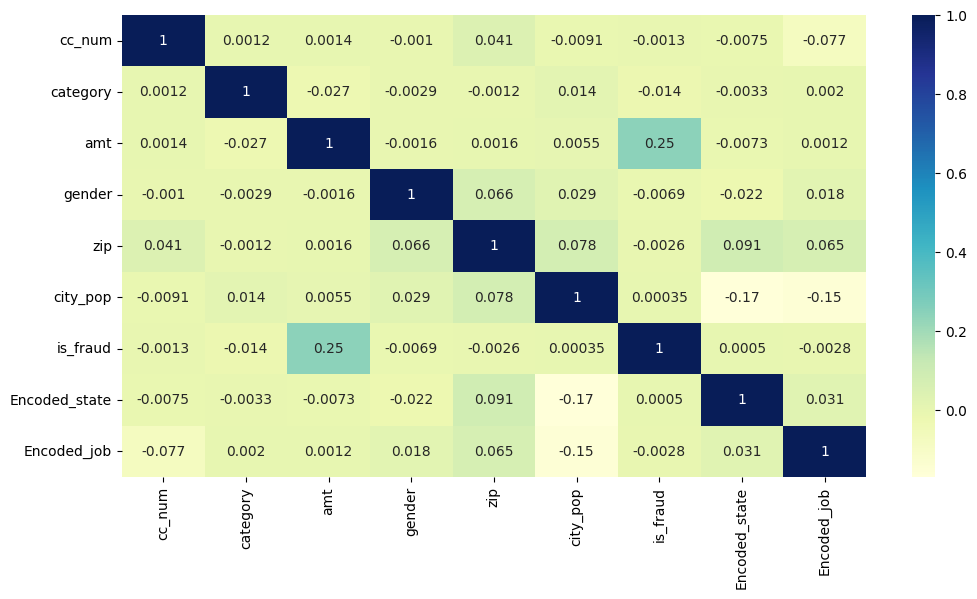

In [73]:
import matplotlib.pyplot as plt
import seaborn as sb

fig, ax = plt.subplots(figsize=(12, 6))

dataplot = sb.heatmap(cc_df.corr(), cmap="YlGnBu", annot=True, ax=ax)

plt.show()

In [74]:
fraud_ones = cc_df[cc_df['is_fraud'] == 1]

fraud_zeros = cc_df[cc_df['is_fraud'] == 0]

In [75]:
target=cc_df.is_fraud
target

0          0
1          0
2          0
3          0
4          0
          ..
1298815    1
1298816    1
1298817    1
1298818    1
1298819    1
Name: is_fraud, Length: 1298820, dtype: int64

In [76]:
cc_df.drop(['is_fraud'],axis=1,inplace=True)

In [77]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298820 entries, 0 to 1298819
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   cc_num         1298820 non-null  int64  
 1   category       1298820 non-null  int64  
 2   amt            1298820 non-null  float64
 3   gender         1298820 non-null  int64  
 4   zip            1298820 non-null  int64  
 5   city_pop       1298820 non-null  int64  
 6   Encoded_state  1298820 non-null  float64
 7   Encoded_job    1298820 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 79.3 MB


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(cc_df,target,test_size=0.2,random_state=30)

In [80]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [81]:
X_train

array([[-0.31830595,  1.23137375, -0.40329709, ...,  0.01181082,
        -0.32294919,  0.21337452],
       [-0.31857026,  0.4381752 , -0.18194787, ..., -0.27580399,
         0.75890781, -2.44006421],
       [-0.31662373, -0.35502336, -0.04494881, ...,  3.82008377,
        -1.13434193,  0.21337452],
       ...,
       [-0.31684744,  2.02457231, -0.38763295, ..., -0.2831715 ,
         0.75890781,  0.21337452],
       [-0.31399804,  0.4381752 , -0.26244415, ..., -0.29383998,
         0.75890781, -5.09350295],
       [-0.31518998,  0.4381752 , -0.37669291, ..., -0.28889185,
        -1.67527043,  0.21337452]])

In [82]:
X_train.shape

(1039056, 8)

In [83]:
X_test.shape

(259764, 8)

In [84]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [85]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import GridSearchCV

In [86]:
classifier=Sequential()
classifier.add(Dense(units=8,activation='relu'))
classifier.add(Dense(units=16,activation='relu'))
classifier.add(Dense(units=24,activation='relu'))
classifier.add(Dense(units=16,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [87]:
model_history=classifier.fit(X_train,y_train,validation_split=0.3,batch_size=1000,epochs=50)

Epoch 1/50
728/728 [==============================] - 10s 11ms/step - loss: 0.1555 - accuracy: 0.9897 - val_loss: 0.0541 - val_accuracy: 0.9925
Epoch 2/50
728/728 [==============================] - 3s 4ms/step - loss: 0.0486 - accuracy: 0.9926 - val_loss: 0.0467 - val_accuracy: 0.9925
Epoch 3/50
728/728 [==============================] - 3s 4ms/step - loss: 0.0439 - accuracy: 0.9926 - val_loss: 0.0434 - val_accuracy: 0.9925
Epoch 4/50
728/728 [==============================] - 2s 3ms/step - loss: 0.0413 - accuracy: 0.9926 - val_loss: 0.0413 - val_accuracy: 0.9925
Epoch 5/50
728/728 [==============================] - 4s 6ms/step - loss: 0.0395 - accuracy: 0.9926 - val_loss: 0.0397 - val_accuracy: 0.9925
Epoch 6/50
728/728 [==============================] - 3s 4ms/step - loss: 0.0381 - accuracy: 0.9926 - val_loss: 0.0383 - val_accuracy: 0.9925
Epoch 7/50
728/728 [==============================] - 3s 4ms/step - loss: 0.0368 - accuracy: 0.9926 - val_loss: 0.0369 - val_accuracy: 0.9925
Epoc

In [88]:
y_pred=classifier.predict(X_test)
y_pred= (y_pred>=0.5)

8118/8118 [==============================] - 14s 2ms/step


In [89]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[257802,      4],
       [  1957,      1]])

In [90]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.9924508399932246


In [91]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                           activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,
    executions_per_trial=2,
    directory='my_dir',
    project_name='helloworld')

tuner.search(X_train, y_train, epochs=5)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs=10)

Trial 1 Complete [00h 13m 02s]

Best val_accuracy So Far: None
Total elapsed time: 00h 13m 02s
Epoch 1/10
32471/32471 [==============================] - 70s 2ms/step - loss: 0.0220 - accuracy: 0.9941
Epoch 2/10
32471/32471 [==============================] - 71s 2ms/step - loss: 0.0180 - accuracy: 0.9953
Epoch 3/10
32471/32471 [==============================] - 69s 2ms/step - loss: 0.0178 - accuracy: 0.9956
Epoch 4/10
32471/32471 [==============================] - 69s 2ms/step - loss: 0.0174 - accuracy: 0.9957
Epoch 5/10
32471/32471 [==============================] - 70s 2ms/step - loss: 0.0173 - accuracy: 0.9957
Epoch 6/10
32471/32471 [==============================] - 71s 2ms/step - loss: 0.0172 - accuracy: 0.9958
Epoch 7/10
32471/32471 [==============================] - 71s 2ms/step - loss: 0.0172 - accuracy: 0.9957
Epoch 8/10
32471/32471 [==============================] - 72s 2ms/step - loss: 0.0171 - accuracy: 0.9958
Epoch 9/10
32471/32471 [==============================] - 74s 2ms

In [92]:
import tensorflow

In [93]:
classifier_reg=Sequential()
classifier_reg.add(Dense(units=11,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
classifier_reg.add(Dense(units=22,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
classifier_reg.add(Dense(units=33,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
classifier_reg.add(Dense(units=22,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
classifier_reg.add(Dense(units=11,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
classifier_reg.add(Dense(units=1,activation='sigmoid'))

In [94]:
classifier_reg.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [95]:
model_history=classifier_reg.fit(X_train,y_train,validation_split=0.3,batch_size=1000,epochs=50)

Epoch 1/50
728/728 [==============================] - 4s 5ms/step - loss: 0.5454 - accuracy: 0.9780 - val_loss: 0.4161 - val_accuracy: 0.9925
Epoch 2/50
728/728 [==============================] - 3s 4ms/step - loss: 0.4029 - accuracy: 0.9926 - val_loss: 0.3939 - val_accuracy: 0.9925
Epoch 3/50
728/728 [==============================] - 4s 5ms/step - loss: 0.3841 - accuracy: 0.9926 - val_loss: 0.3768 - val_accuracy: 0.9925
Epoch 4/50
728/728 [==============================] - 4s 5ms/step - loss: 0.3680 - accuracy: 0.9926 - val_loss: 0.3614 - val_accuracy: 0.9925
Epoch 5/50
728/728 [==============================] - 3s 4ms/step - loss: 0.3532 - accuracy: 0.9926 - val_loss: 0.3470 - val_accuracy: 0.9925
Epoch 6/50
728/728 [==============================] - 3s 4ms/step - loss: 0.3392 - accuracy: 0.9926 - val_loss: 0.3333 - val_accuracy: 0.9925
Epoch 7/50
728/728 [==============================] - 4s 5ms/step - loss: 0.3258 - accuracy: 0.9926 - val_loss: 0.3201 - val_accuracy: 0.9925
Epoch 

In [96]:
y_pred=classifier_reg.predict(X_test)
y_pred= (y_pred>=0.5)

8118/8118 [==============================] - 14s 2ms/step


In [97]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[257806,      0],
       [  1958,      0]])

In [98]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9924623889376512


In [99]:
fraud_zeros

,cc_num,category,amt,gender,zip,city_pop,is_fraud,Encoded_state,Encoded_job
0,2703186189652095,12,4.97,2,28654,3495,0,11.0,12.0
1,630423337322,2,107.23,2,99160,149,0,11.0,12.0
2,38859492057661,7,220.11,1,83252,4154,0,11.0,12.0
3,3534093764340240,1,45.00,1,59632,1939,0,11.0,12.0
4,375534208663984,11,41.96,1,24433,99,0,11.0,12.0
...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,7,15.56,1,84735,258,0,11.0,12.0
1296671,6011149206456997,8,51.70,1,21790,100,0,11.0,12.0
1296672,3514865930894695,8,105.93,1,88325,899,0,11.0,9.0
1296673,2720012583106919,8,74.90,1,57756,1126,0,11.0,12.0


In [100]:
fraud_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1289169 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   cc_num         1289169 non-null  int64  
 1   category       1289169 non-null  int64  
 2   amt            1289169 non-null  float64
 3   gender         1289169 non-null  int64  
 4   zip            1289169 non-null  int64  
 5   city_pop       1289169 non-null  int64  
 6   is_fraud       1289169 non-null  int64  
 7   Encoded_state  1289169 non-null  float64
 8   Encoded_job    1289169 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 98.4 MB


In [101]:
import numpy as np

dfs_0 = []
for i, part in enumerate(np.array_split(fraud_zeros, 10)):
    dfs_0.append(part)

In [102]:
res_df = pd.concat([dfs_0[0], fraud_ones])

# Shuffle the rows of the concatenated DataFrame
res_df_1 = res_df.sample(frac=1).reset_index(drop=True)

In [103]:
res_df_1

,cc_num,category,amt,gender,zip,city_pop,is_fraud,Encoded_state,Encoded_job
0,4208110975550360171,4,119.50,1,31567,782,0,11.0,3.0
1,3513506355699497,2,92.87,2,39157,24645,0,11.0,12.0
2,560881134780,9,12.42,2,46946,136,0,11.0,12.0
3,372509258176510,10,41.06,2,48438,6951,0,8.0,12.0
4,4149635823017,4,6.49,1,35049,3996,0,9.0,12.0
...,...,...,...,...,...,...,...,...,...
138563,3504178999463051,11,7.87,1,45801,86954,0,5.0,1.0
138564,30596478689301,2,54.42,1,80005,122111,0,11.0,12.0
138565,373043435942726,6,928.19,1,77417,2457,1,2.0,10.0
138566,4560395181594436016,6,2.58,2,95453,11256,0,4.0,12.0


In [104]:
target=res_df_1.is_fraud
target

0         0
1         0
2         0
3         0
4         0
         ..
138563    0
138564    0
138565    1
138566    0
138567    0
Name: is_fraud, Length: 138568, dtype: int64

In [105]:
res_df_1.drop(['is_fraud'],axis=1,inplace=True)

In [106]:
X_train,X_test,y_train,y_test=train_test_split(res_df_1,target,test_size=0.2,random_state=30)

In [107]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [108]:
classifier1=Sequential()

In [109]:
classifier1.add(Dense(units=8,activation='relu'))
classifier1.add(Dense(units=16,activation='relu'))
classifier1.add(Dense(units=24,activation='relu'))
classifier1.add(Dense(units=16,activation='relu'))
classifier1.add(Dense(units=8,activation='relu'))
classifier1.add(Dense(units=1,activation='sigmoid'))

In [110]:
classifier1.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [111]:
model_history=classifier1.fit(X_train,y_train,validation_split=0.3,batch_size=1000,epochs=50)

Epoch 1/50
78/78 [==============================] - 2s 10ms/step - loss: 0.5381 - accuracy: 0.9310 - val_loss: 0.4281 - val_accuracy: 0.9301
Epoch 2/50
78/78 [==============================] - 1s 7ms/step - loss: 0.3716 - accuracy: 0.9312 - val_loss: 0.3322 - val_accuracy: 0.9301
Epoch 3/50
78/78 [==============================] - 0s 6ms/step - loss: 0.3112 - accuracy: 0.9312 - val_loss: 0.2977 - val_accuracy: 0.9301
Epoch 4/50
78/78 [==============================] - 0s 6ms/step - loss: 0.2863 - accuracy: 0.9312 - val_loss: 0.2798 - val_accuracy: 0.9301
Epoch 5/50
78/78 [==============================] - 1s 7ms/step - loss: 0.2715 - accuracy: 0.9312 - val_loss: 0.2680 - val_accuracy: 0.9301
Epoch 6/50
78/78 [==============================] - 0s 6ms/step - loss: 0.2613 - accuracy: 0.9312 - val_loss: 0.2596 - val_accuracy: 0.9301
Epoch 7/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2538 - accuracy: 0.9312 - val_loss: 0.2530 - val_accuracy: 0.9301
Epoch 8/50
78/78 [=

In [112]:
y_pred=classifier1.predict(X_test)
y_pred= (y_pred>=0.5)

867/867 [==============================] - 1s 2ms/step


In [113]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[25548,   180],
       [ 1017,   969]])

In [114]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9568088330807534


In [115]:
res_df = pd.concat([dfs_0[9], fraud_ones])

# Shuffle the rows of the concatenated DataFrame
res_df_2 = res_df.sample(frac=1).reset_index(drop=True)

In [116]:
target2=res_df_2.is_fraud
target2

0         0
1         0
2         0
3         0
4         0
         ..
138562    0
138563    0
138564    0
138565    0
138566    1
Name: is_fraud, Length: 138567, dtype: int64

In [117]:
res_df_2.drop(['is_fraud'],axis=1,inplace=True)

In [118]:
X_train,X_test,y_train,y_test=train_test_split(res_df_2,target2,test_size=0.2,random_state=30)

In [119]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [120]:
classifier2=Sequential()
classifier2.add(Dense(units=8,activation='relu'))
classifier2.add(Dense(units=16,activation='relu'))
classifier2.add(Dense(units=24,activation='relu'))
classifier2.add(Dense(units=16,activation='relu'))
classifier2.add(Dense(units=8,activation='relu'))
classifier2.add(Dense(units=1,activation='sigmoid'))

In [121]:
classifier2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [122]:
model_history=classifier2.fit(X_train,y_train,validation_split=0.3,batch_size=1000,epochs=50)

Epoch 1/50
78/78 [==============================] - 2s 7ms/step - loss: 0.5621 - accuracy: 0.9145 - val_loss: 0.4444 - val_accuracy: 0.9296
Epoch 2/50
78/78 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.9299 - val_loss: 0.3197 - val_accuracy: 0.9296
Epoch 3/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2930 - accuracy: 0.9299 - val_loss: 0.2741 - val_accuracy: 0.9296
Epoch 4/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2598 - accuracy: 0.9299 - val_loss: 0.2497 - val_accuracy: 0.9296
Epoch 5/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2397 - accuracy: 0.9299 - val_loss: 0.2334 - val_accuracy: 0.9296
Epoch 6/50
78/78 [==============================] - 0s 5ms/step - loss: 0.2256 - accuracy: 0.9299 - val_loss: 0.2216 - val_accuracy: 0.9296
Epoch 7/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2151 - accuracy: 0.9299 - val_loss: 0.2125 - val_accuracy: 0.9295
Epoch 8/50
78/78 [==

In [123]:
y_pred=classifier2.predict(X_test)
y_pred= (y_pred>=0.5)

867/867 [==============================] - 2s 2ms/step


In [124]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[25599,   243],
       [  700,  1172]])

In [125]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9659738760193404


In [126]:
res_df = pd.concat([dfs_0[1], fraud_ones])

# Shuffle the rows of the concatenated DataFrame
res_df_3 = res_df.sample(frac=1).reset_index(drop=True)

In [127]:
target3=res_df_3.is_fraud
target3

0         0
1         1
2         0
3         0
4         0
         ..
138563    0
138564    0
138565    0
138566    0
138567    0
Name: is_fraud, Length: 138568, dtype: int64

In [128]:
res_df_3.drop(['is_fraud'],axis=1,inplace=True)

In [129]:
X_train,X_test,y_train,y_test=train_test_split(res_df_3,target3,test_size=0.2,random_state=30)

In [130]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [132]:
classifier3=Sequential()
classifier3.add(Dense(units=8,activation='relu'))
classifier3.add(Dense(units=16,activation='relu'))
classifier3.add(Dense(units=24,activation='relu'))
classifier3.add(Dense(units=16,activation='relu'))
classifier3.add(Dense(units=8,activation='relu'))
classifier3.add(Dense(units=1,activation='sigmoid'))

In [133]:
classifier3.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [134]:
model_history=classifier3.fit(X_train,y_train,validation_split=0.3,batch_size=1000,epochs=50)

Epoch 1/50
78/78 [==============================] - 2s 11ms/step - loss: 0.6426 - accuracy: 0.7186 - val_loss: 0.5142 - val_accuracy: 0.9279
Epoch 2/50
78/78 [==============================] - 1s 7ms/step - loss: 0.4282 - accuracy: 0.9310 - val_loss: 0.3611 - val_accuracy: 0.9282
Epoch 3/50
78/78 [==============================] - 0s 4ms/step - loss: 0.3160 - accuracy: 0.9312 - val_loss: 0.2870 - val_accuracy: 0.9283
Epoch 4/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2649 - accuracy: 0.9313 - val_loss: 0.2567 - val_accuracy: 0.9283
Epoch 5/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2438 - accuracy: 0.9312 - val_loss: 0.2432 - val_accuracy: 0.9283
Epoch 6/50
78/78 [==============================] - 0s 5ms/step - loss: 0.2324 - accuracy: 0.9312 - val_loss: 0.2334 - val_accuracy: 0.9282
Epoch 7/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2226 - accuracy: 0.9311 - val_loss: 0.2234 - val_accuracy: 0.9280
Epoch 8/50
78/78 [=

In [135]:
y_pred=classifier3.predict(X_test)
y_pred= (y_pred>=0.5)

867/867 [==============================] - 3s 3ms/step


In [136]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[25493,   282],
       [  575,  1364]])

In [137]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9690770007938226


In [138]:
res_df = pd.concat([dfs_0[2], fraud_ones])

# Shuffle the rows of the concatenated DataFrame
res_df_4 = res_df.sample(frac=1).reset_index(drop=True)

In [139]:
target4=res_df_4.is_fraud
target4

0         0
1         0
2         0
3         0
4         0
         ..
138563    0
138564    0
138565    0
138566    0
138567    1
Name: is_fraud, Length: 138568, dtype: int64

In [140]:
res_df_4.drop(['is_fraud'],axis=1,inplace=True)

In [141]:
X_train,X_test,y_train,y_test=train_test_split(res_df_4,target4,test_size=0.2,random_state=30)

In [142]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [143]:
classifier4=Sequential()
classifier4.add(Dense(units=8,activation='relu'))
classifier4.add(Dense(units=16,activation='relu'))
classifier4.add(Dense(units=24,activation='relu'))
classifier4.add(Dense(units=16,activation='relu'))
classifier4.add(Dense(units=8,activation='relu'))
classifier4.add(Dense(units=1,activation='sigmoid'))

In [144]:
classifier4.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [145]:
model_history=classifier4.fit(X_train,y_train,validation_split=0.3,batch_size=1000,epochs=50)

Epoch 1/50
78/78 [==============================] - 2s 11ms/step - loss: 0.5340 - accuracy: 0.9296 - val_loss: 0.4273 - val_accuracy: 0.9320
Epoch 2/50
78/78 [==============================] - 1s 7ms/step - loss: 0.3618 - accuracy: 0.9301 - val_loss: 0.3071 - val_accuracy: 0.9320
Epoch 3/50
78/78 [==============================] - 0s 6ms/step - loss: 0.2864 - accuracy: 0.9301 - val_loss: 0.2617 - val_accuracy: 0.9320
Epoch 4/50
78/78 [==============================] - 0s 5ms/step - loss: 0.2541 - accuracy: 0.9301 - val_loss: 0.2362 - val_accuracy: 0.9319
Epoch 5/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2323 - accuracy: 0.9298 - val_loss: 0.2164 - val_accuracy: 0.9317
Epoch 6/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2152 - accuracy: 0.9296 - val_loss: 0.2018 - val_accuracy: 0.9314
Epoch 7/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2029 - accuracy: 0.9292 - val_loss: 0.1912 - val_accuracy: 0.9314
Epoch 8/50
78/78 [=

In [146]:
y_pred=classifier4.predict(X_test)
y_pred= (y_pred>=0.5)

867/867 [==============================] - 3s 4ms/step


In [147]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[25474,   274],
       [  763,  1203]])

In [148]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9625820884751389


In [149]:
res_df = pd.concat([dfs_0[3], fraud_ones])

# Shuffle the rows of the concatenated DataFrame
res_df_5 = res_df.sample(frac=1).reset_index(drop=True)

In [150]:
target5=res_df_5.is_fraud
target5

0         0
1         0
2         0
3         0
4         0
         ..
138563    0
138564    0
138565    0
138566    0
138567    0
Name: is_fraud, Length: 138568, dtype: int64

In [151]:
res_df_5.drop(['is_fraud'],axis=1,inplace=True)

In [152]:
X_train,X_test,y_train,y_test=train_test_split(res_df_5,target5,test_size=0.2,random_state=30)

In [153]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [154]:
classifier5=Sequential()
classifier5.add(Dense(units=8,activation='relu'))
classifier5.add(Dense(units=16,activation='relu'))
classifier5.add(Dense(units=24,activation='relu'))
classifier5.add(Dense(units=16,activation='relu'))
classifier5.add(Dense(units=8,activation='relu'))
classifier5.add(Dense(units=1,activation='sigmoid'))

In [155]:
classifier5.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [156]:
model_history=classifier5.fit(X_train,y_train,validation_split=0.3,batch_size=1000,epochs=50)

Epoch 1/50
78/78 [==============================] - 3s 21ms/step - loss: 0.4564 - accuracy: 0.9261 - val_loss: 0.3422 - val_accuracy: 0.9307
Epoch 2/50
78/78 [==============================] - 1s 9ms/step - loss: 0.3063 - accuracy: 0.9304 - val_loss: 0.2817 - val_accuracy: 0.9307
Epoch 3/50
78/78 [==============================] - 1s 11ms/step - loss: 0.2714 - accuracy: 0.9304 - val_loss: 0.2600 - val_accuracy: 0.9307
Epoch 4/50
78/78 [==============================] - 1s 9ms/step - loss: 0.2543 - accuracy: 0.9304 - val_loss: 0.2452 - val_accuracy: 0.9307
Epoch 5/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2416 - accuracy: 0.9304 - val_loss: 0.2336 - val_accuracy: 0.9307
Epoch 6/50
78/78 [==============================] - 0s 5ms/step - loss: 0.2314 - accuracy: 0.9304 - val_loss: 0.2240 - val_accuracy: 0.9307
Epoch 7/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2226 - accuracy: 0.9304 - val_loss: 0.2153 - val_accuracy: 0.9307
Epoch 8/50
78/78 [

In [157]:
y_pred=classifier5.predict(X_test)
y_pred= (y_pred>=0.5)

867/867 [==============================] - 2s 2ms/step


In [158]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[25475,   290],
       [  617,  1332]])

In [159]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9672728584830771


In [160]:
res_df = pd.concat([dfs_0[4], fraud_ones])

# Shuffle the rows of the concatenated DataFrame
res_df_6 = res_df.sample(frac=1).reset_index(drop=True)

In [161]:
target6=res_df_6.is_fraud
target6

0         0
1         0
2         0
3         0
4         0
         ..
138563    0
138564    0
138565    0
138566    0
138567    0
Name: is_fraud, Length: 138568, dtype: int64

In [162]:
res_df_6.drop(['is_fraud'],axis=1,inplace=True)

In [163]:
X_train,X_test,y_train,y_test=train_test_split(res_df_6,target6,test_size=0.2,random_state=30)

In [164]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [165]:
classifier6=Sequential()
classifier6.add(Dense(units=8,activation='relu'))
classifier6.add(Dense(units=16,activation='relu'))
classifier6.add(Dense(units=24,activation='relu'))
classifier6.add(Dense(units=16,activation='relu'))
classifier6.add(Dense(units=8,activation='relu'))
classifier6.add(Dense(units=1,activation='sigmoid'))

In [166]:
classifier6.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [167]:
model_history=classifier6.fit(X_train,y_train,validation_split=0.3,batch_size=1000,epochs=50)

Epoch 1/50
78/78 [==============================] - 3s 20ms/step - loss: 0.6254 - accuracy: 0.8523 - val_loss: 0.5478 - val_accuracy: 0.9281
Epoch 2/50
78/78 [==============================] - 1s 10ms/step - loss: 0.4859 - accuracy: 0.9311 - val_loss: 0.4342 - val_accuracy: 0.9281
Epoch 3/50
78/78 [==============================] - 1s 12ms/step - loss: 0.3941 - accuracy: 0.9311 - val_loss: 0.3633 - val_accuracy: 0.9281
Epoch 4/50
78/78 [==============================] - 0s 5ms/step - loss: 0.3352 - accuracy: 0.9311 - val_loss: 0.3170 - val_accuracy: 0.9281
Epoch 5/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2970 - accuracy: 0.9311 - val_loss: 0.2877 - val_accuracy: 0.9281
Epoch 6/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2729 - accuracy: 0.9311 - val_loss: 0.2697 - val_accuracy: 0.9281
Epoch 7/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2581 - accuracy: 0.9311 - val_loss: 0.2586 - val_accuracy: 0.9281
Epoch 8/50
78/78 

In [168]:
y_pred=classifier6.predict(X_test)
y_pred= (y_pred>=0.5)

867/867 [==============================] - 2s 2ms/step


In [169]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[25564,   237],
       [  694,  1219]])

In [170]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9664068701739194


In [171]:
res_df = pd.concat([dfs_0[5], fraud_ones])

# Shuffle the rows of the concatenated DataFrame
res_df_7 = res_df.sample(frac=1).reset_index(drop=True)

In [172]:
target7=res_df_7.is_fraud
target7

0         0
1         0
2         0
3         1
4         0
         ..
138563    0
138564    0
138565    0
138566    0
138567    0
Name: is_fraud, Length: 138568, dtype: int64

In [173]:
res_df_7.drop(['is_fraud'],axis=1,inplace=True)

In [174]:
X_train,X_test,y_train,y_test=train_test_split(res_df_7,target7,test_size=0.2,random_state=30)

In [175]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [176]:
classifier7=Sequential()
classifier7.add(Dense(units=8,activation='relu'))
classifier7.add(Dense(units=16,activation='relu'))
classifier7.add(Dense(units=24,activation='relu'))
classifier7.add(Dense(units=16,activation='relu'))
classifier7.add(Dense(units=8,activation='relu'))
classifier7.add(Dense(units=1,activation='sigmoid'))

In [177]:
classifier7.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [178]:
model_history=classifier7.fit(X_train,y_train,validation_split=0.3,batch_size=1000,epochs=50)

Epoch 1/50
78/78 [==============================] - 3s 11ms/step - loss: 0.6065 - accuracy: 0.7679 - val_loss: 0.4767 - val_accuracy: 0.9296
Epoch 2/50
78/78 [==============================] - 1s 7ms/step - loss: 0.4018 - accuracy: 0.9305 - val_loss: 0.3392 - val_accuracy: 0.9296
Epoch 3/50
78/78 [==============================] - 1s 6ms/step - loss: 0.3009 - accuracy: 0.9305 - val_loss: 0.2723 - val_accuracy: 0.9296
Epoch 4/50
78/78 [==============================] - 1s 7ms/step - loss: 0.2577 - accuracy: 0.9305 - val_loss: 0.2480 - val_accuracy: 0.9296
Epoch 5/50
78/78 [==============================] - 0s 5ms/step - loss: 0.2431 - accuracy: 0.9305 - val_loss: 0.2400 - val_accuracy: 0.9296
Epoch 6/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2382 - accuracy: 0.9305 - val_loss: 0.2369 - val_accuracy: 0.9296
Epoch 7/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.9305 - val_loss: 0.2351 - val_accuracy: 0.9296
Epoch 8/50
78/78 [=

In [179]:
y_pred=classifier7.predict(X_test)
y_pred= (y_pred>=0.5)

867/867 [==============================] - 2s 2ms/step


In [180]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[25799,     0],
       [ 1915,     0]])

In [181]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9309013494984484


In [182]:
res_df = pd.concat([dfs_0[6], fraud_ones])

# Shuffle the rows of the concatenated DataFrame
res_df_8 = res_df.sample(frac=1).reset_index(drop=True)

In [183]:
target8=res_df_8.is_fraud
target8

0         0
1         0
2         0
3         0
4         1
         ..
138563    0
138564    0
138565    0
138566    0
138567    0
Name: is_fraud, Length: 138568, dtype: int64

In [184]:
res_df_8.drop(['is_fraud'],axis=1,inplace=True)

In [185]:
X_train,X_test,y_train,y_test=train_test_split(res_df_8,target8,test_size=0.2,random_state=30)

In [186]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [188]:
classifier8=Sequential()
classifier8.add(Dense(units=8,activation='relu'))
classifier8.add(Dense(units=16,activation='relu'))
classifier8.add(Dense(units=24,activation='relu'))
classifier8.add(Dense(units=16,activation='relu'))
classifier8.add(Dense(units=8,activation='relu'))
classifier8.add(Dense(units=1,activation='sigmoid'))

In [189]:
classifier8.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [190]:
model_history=classifier8.fit(X_train,y_train,validation_split=0.3,batch_size=1000,epochs=50)

Epoch 1/50
78/78 [==============================] - 3s 13ms/step - loss: 0.5541 - accuracy: 0.8974 - val_loss: 0.4302 - val_accuracy: 0.9291
Epoch 2/50
78/78 [==============================] - 1s 7ms/step - loss: 0.3558 - accuracy: 0.9302 - val_loss: 0.3031 - val_accuracy: 0.9291
Epoch 3/50
78/78 [==============================] - 1s 8ms/step - loss: 0.2779 - accuracy: 0.9302 - val_loss: 0.2638 - val_accuracy: 0.9291
Epoch 4/50
78/78 [==============================] - 1s 12ms/step - loss: 0.2534 - accuracy: 0.9302 - val_loss: 0.2496 - val_accuracy: 0.9291
Epoch 5/50
78/78 [==============================] - 1s 13ms/step - loss: 0.2419 - accuracy: 0.9302 - val_loss: 0.2405 - val_accuracy: 0.9291
Epoch 6/50
78/78 [==============================] - 1s 7ms/step - loss: 0.2330 - accuracy: 0.9302 - val_loss: 0.2324 - val_accuracy: 0.9291
Epoch 7/50
78/78 [==============================] - 1s 7ms/step - loss: 0.2249 - accuracy: 0.9302 - val_loss: 0.2248 - val_accuracy: 0.9290
Epoch 8/50
78/78 

In [191]:
y_pred=classifier8.predict(X_test)
y_pred= (y_pred>=0.5)

867/867 [==============================] - 1s 2ms/step


In [192]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[25506,   332],
       [  561,  1315]])

In [193]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9677780183300859


In [194]:
res_df = pd.concat([dfs_0[7], fraud_ones])

# Shuffle the rows of the concatenated DataFrame
res_df_9 = res_df.sample(frac=1).reset_index(drop=True)

In [195]:
target9=res_df_9.is_fraud
target9

0         0
1         0
2         0
3         0
4         0
         ..
138563    0
138564    0
138565    0
138566    0
138567    0
Name: is_fraud, Length: 138568, dtype: int64

In [196]:
res_df_9.drop(['is_fraud'],axis=1,inplace=True)

In [197]:
X_train,X_test,y_train,y_test=train_test_split(res_df_9,target9,test_size=0.2,random_state=30)

In [198]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [199]:
classifier9=Sequential()
classifier9.add(Dense(units=8,activation='relu'))
classifier9.add(Dense(units=16,activation='relu'))
classifier9.add(Dense(units=24,activation='relu'))
classifier9.add(Dense(units=16,activation='relu'))
classifier9.add(Dense(units=8,activation='relu'))
classifier9.add(Dense(units=1,activation='sigmoid'))

In [200]:
classifier9.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [201]:
model_history=classifier9.fit(X_train,y_train,validation_split=0.3,batch_size=1000,epochs=50)

Epoch 1/50
78/78 [==============================] - 4s 11ms/step - loss: 0.4839 - accuracy: 0.8997 - val_loss: 0.3536 - val_accuracy: 0.9296
Epoch 2/50
78/78 [==============================] - 1s 7ms/step - loss: 0.2916 - accuracy: 0.9312 - val_loss: 0.2546 - val_accuracy: 0.9296
Epoch 3/50
78/78 [==============================] - 1s 10ms/step - loss: 0.2330 - accuracy: 0.9312 - val_loss: 0.2219 - val_accuracy: 0.9294
Epoch 4/50
78/78 [==============================] - 1s 7ms/step - loss: 0.2069 - accuracy: 0.9309 - val_loss: 0.2013 - val_accuracy: 0.9289
Epoch 5/50
78/78 [==============================] - 0s 4ms/step - loss: 0.1883 - accuracy: 0.9313 - val_loss: 0.1852 - val_accuracy: 0.9329
Epoch 6/50
78/78 [==============================] - 0s 5ms/step - loss: 0.1737 - accuracy: 0.9439 - val_loss: 0.1729 - val_accuracy: 0.9489
Epoch 7/50
78/78 [==============================] - 0s 4ms/step - loss: 0.1633 - accuracy: 0.9539 - val_loss: 0.1646 - val_accuracy: 0.9534
Epoch 8/50
78/78 [

In [202]:
y_pred=classifier9.predict(X_test)
y_pred= (y_pred>=0.5)

867/867 [==============================] - 3s 3ms/step


In [203]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[25525,   218],
       [  680,  1291]])

In [204]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9675976040990113


In [205]:
res_df = pd.concat([dfs_0[8], fraud_ones])

# Shuffle the rows of the concatenated DataFrame
res_df_10 = res_df.sample(frac=1).reset_index(drop=True)

In [206]:
target10=res_df_10.is_fraud
target10

0         0
1         0
2         0
3         0
4         0
         ..
138563    0
138564    0
138565    0
138566    0
138567    0
Name: is_fraud, Length: 138568, dtype: int64

In [207]:
res_df_10.drop(['is_fraud'],axis=1,inplace=True)

In [208]:
X_train,X_test,y_train,y_test=train_test_split(res_df_10,target10,test_size=0.2,random_state=30)

In [209]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [210]:
classifier10=Sequential()
classifier10.add(Dense(units=8,activation='relu'))
classifier10.add(Dense(units=16,activation='relu'))
classifier10.add(Dense(units=24,activation='relu'))
classifier10.add(Dense(units=16,activation='relu'))
classifier10.add(Dense(units=8,activation='relu'))
classifier10.add(Dense(units=1,activation='sigmoid'))

In [211]:
classifier10.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [212]:
model_history=classifier10.fit(X_train,y_train,validation_split=0.3,batch_size=1000,epochs=50)

Epoch 1/50
78/78 [==============================] - 2s 12ms/step - loss: 0.5945 - accuracy: 0.8819 - val_loss: 0.5032 - val_accuracy: 0.9293
Epoch 2/50
78/78 [==============================] - 1s 8ms/step - loss: 0.4349 - accuracy: 0.9305 - val_loss: 0.3745 - val_accuracy: 0.9293
Epoch 3/50
78/78 [==============================] - 1s 8ms/step - loss: 0.3307 - accuracy: 0.9305 - val_loss: 0.2981 - val_accuracy: 0.9293
Epoch 4/50
78/78 [==============================] - 1s 7ms/step - loss: 0.2762 - accuracy: 0.9305 - val_loss: 0.2635 - val_accuracy: 0.9293
Epoch 5/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2524 - accuracy: 0.9305 - val_loss: 0.2482 - val_accuracy: 0.9293
Epoch 6/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2405 - accuracy: 0.9305 - val_loss: 0.2389 - val_accuracy: 0.9293
Epoch 7/50
78/78 [==============================] - 0s 4ms/step - loss: 0.2320 - accuracy: 0.9305 - val_loss: 0.2307 - val_accuracy: 0.9293
Epoch 8/50
78/78 [=

In [213]:
y_pred=classifier10.predict(X_test)
y_pred= (y_pred>=0.5)

867/867 [==============================] - 2s 2ms/step


In [214]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[25522,   289],
       [  652,  1251]])

In [215]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9660460417117702


In [217]:
from sklearn.cluster import KMeans

In [218]:
# Create an elbow plot to find the best number of cluster
X = cc_df[['category', 'amt']].to_numpy()
wcse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X)
    wcse.append(kmeans.inertia_)

In [219]:
import seaborn as sns

<Axes: >

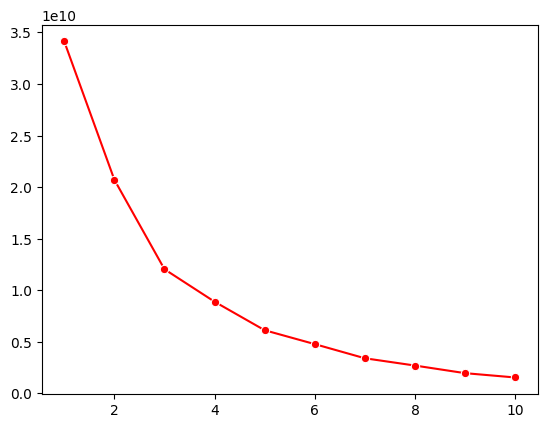

In [220]:
sns.lineplot(x=range(1, 11), y=wcse, marker='o', color='red')

In [221]:
# Creating the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=6, n_init='auto', random_state=42)

In [222]:
y = kmeans.predict(X)

[]

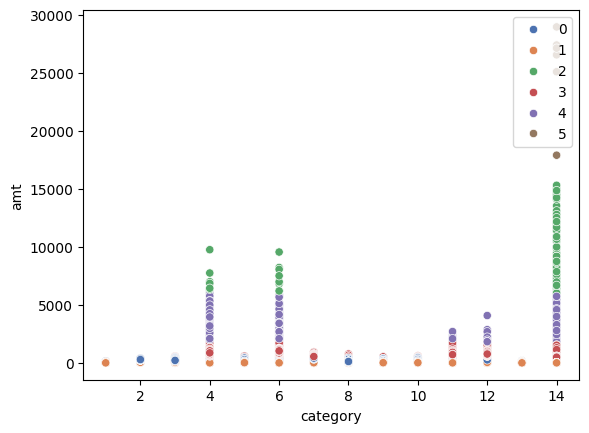

In [225]:
sns.scatterplot(x='category', y='amt', data=cc_df, hue=y, palette='deep')
plt.legend(loc='upper right')
plt.plot()

[]

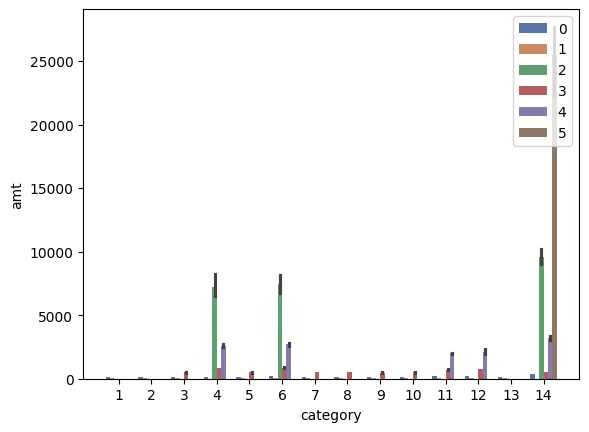

In [226]:
sns.barplot(x='category', y='amt', data=cc_df, hue=y, palette='deep')
plt.legend(loc='upper right')
plt.plot()

In [227]:
df=pd.read_csv(r"/content/drive/MyDrive/Fraud_Detection_Project/fraudTrain.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [228]:
# Create an elbow plot to find the best number of cluster
X = df[['is_fraud', 'amt']].to_numpy()
wcse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X)
    wcse.append(kmeans.inertia_)

<Axes: >

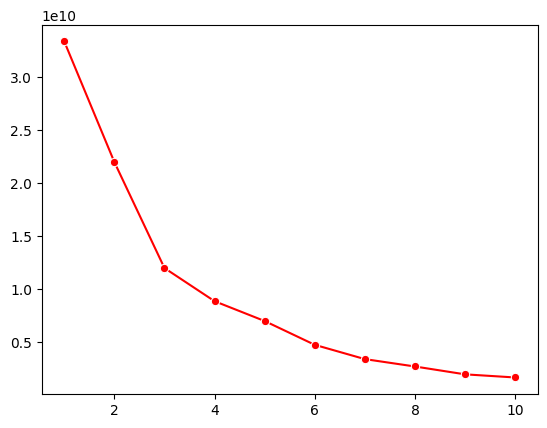

In [229]:
sns.lineplot(x=range(1, 11), y=wcse, marker='o', color='red')

In [230]:
# Creating the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=6, n_init='auto', random_state=42)

In [231]:
y = kmeans.predict(X)

[]

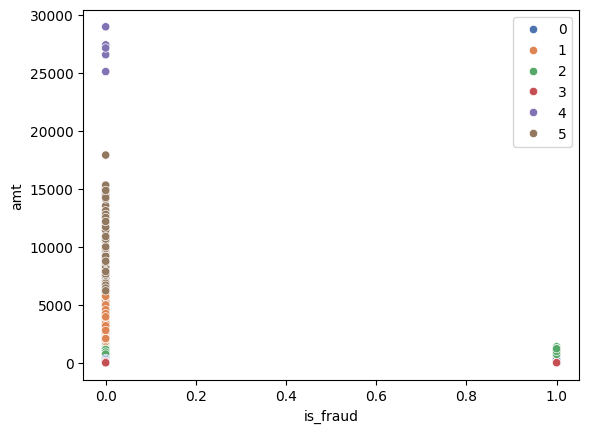

In [232]:
sns.scatterplot(x='is_fraud', y='amt', data=df, hue=y, palette='deep')
plt.legend(loc='upper right')
plt.plot()